<IPython.core.display.Javascript object>


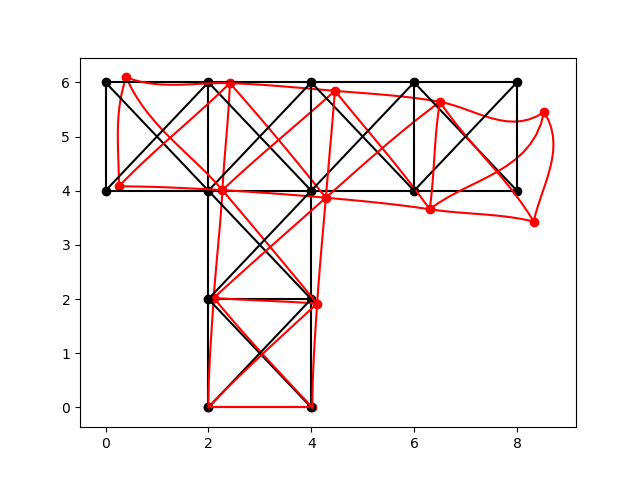

The max deformation is at7.428571428571429 5.428571428571429 and has the value of 0.004041790176853248


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin,cos,pi,sqrt
data = np.array([   [5,6,90,2,0],
                    [6,7,90,2,0],
                    [3,11,90,2,0],
                    [3,7,0,2,0],
                    [7,8,0,2,0],
                    [8,9,0,2,0],
                    [4,10,90,2,0],
                    [13,14,0,2,1000],
                    [12,13,0,2,1000],
                    [2,3,90,2,0],
                    [1,2,90,2,0],
                    [1,5,0,2,0],
                    [2,6,0,2,0],
                    [11,12,0,2,1000],
                    [2,5,-45,2.82842712,0],
                    [1,6,45,2.82842712,0],
                    [3,6,-45,2.82842712,0],
                    [2,7,45,2.82842712,0],
                    [11,7,-45,2.82842712,0],
                    [3,12,45,2.82842712,0],
                    [12,8,-45,2.82842712,0],
                    [7,13,45,2.82842712,0],
                    [13,9,-45,2.82842712,0],
                    [8,14,45,2.82842712,0],
                    [10,3,-45,2.82842712,0],
                    [4,11,45,2.82842712,0],
                    [10,11,0,2,1000],
                    [4,3,0,2,0],
                    [9,14,90,2,0],
                    [7,12,90,2,0],
                    [8,13,90,2,0]])
Nodes = np.array([[2,0],
                  [2,2],
                  [2,4],
                  [0,4],
                  [4,0],
                  [4,2],
                  [4,4],
                  [6,4],
                  [8,4],
                  [0,6],
                  [2,6],
                  [4,6],
                  [6,6],
                  [8,6]])


N = 31
n=14
E = 210*10**9
A = 5*10**(-4)
p = 10000*cos(pi/4)
I = 10**(-7)
M = 200

k = np.zeros([3*n,3*n])
f = np.zeros([3*n])
for e in range(N):
    h = data[e,3]
    alfa = -((data[e,2]*pi)/180)
    u = (A*h**2)/(2*I)
    Qe = data[e,4]
    fe = np.array([-6*(Qe*h/12)*sin(alfa),6*(Qe*h/12)*cos(alfa),-h*(Qe*h/12),-6*(Qe*h/12)*sin(alfa),6*(Qe*h/12)*cos(alfa),h*(Qe*h/12)])
    
    ke = ((2*E*I)/(h**3))*np.array([[u*cos(alfa)**2+6*sin(alfa)**2,(u-6)*sin(alfa)*cos(alfa),3*h*sin(alfa),-(u*cos(alfa)**2+6*sin(alfa)**2),-(u-6)*sin(alfa)*cos(alfa),3*h*sin(alfa)],
                                    [(u-6)*sin(alfa)*cos(alfa),(u*sin(alfa)**2+6*cos(alfa)**2),-3*h*cos(alfa),-(u-6)*sin(alfa)*cos(alfa),-(u*sin(alfa)**2+6*cos(alfa)**2),-3*h*cos(alfa)],
                                    [3*h*sin(alfa),-3*h*cos(alfa),2*h**2,-3*h*sin(alfa),3*h*cos(alfa),h**2],
                                    [-(u*cos(alfa)**2+6*sin(alfa)**2),-(u-6)*sin(alfa)*cos(alfa),-3*h*sin(alfa),(u*cos(alfa)**2+6*sin(alfa)**2),(u-6)*sin(alfa)*cos(alfa),-3*h*sin(alfa)],
                                    [-(u-6)*sin(alfa)*cos(alfa),-(u*sin(alfa)**2+6*cos(alfa)**2),3*h*cos(alfa),(u-6)*sin(alfa)*cos(alfa),(u*sin(alfa)**2+6*cos(alfa)**2),3*h*cos(alfa)],
                                    [3*h*sin(alfa),-3*h*cos(alfa),h**2,-3*h*sin(alfa),3*h*cos(alfa),2*h**2]])
    f[int(data[e,0]-1)*3:int(data[e,0]-1)*3+3] += fe[0:3]
    f[int(data[e,1]-1)*3:int(data[e,1]-1)*3+3] += fe[3:6]
    for i in range(2):
        for j in range(2):
            k[int(data[e][i])*3-3:int(data[e][i])*3,int(data[e][j])*3-3:int(data[e][j])*3] += ke[3*i:3*i+3,3*j:3*j+3]

       
# PointLoads
f[9] += -p
f[10] += p
f[24] += p
f[25] += p
f[39] += p
f[40] += -p
f[29] += M
for i in range(2*n):
    k[0,i] = 0
    k[1,i] = 0
    k[2,i] = 0 
    k[13,i] = 0
    k[14,i] = 0 
f[0] = f[1] = f[2] = f[13] = f[14] = 0
k[0,0] = k[1,1] = k[2,2] = k[13,13] = k[14,14] = 1
u = np.linalg.solve(k,f)
Deltas = np.reshape(u, (-1, 3))
############################################ post process #################################
sigmamax , index= 0, np.zeros([2])
def phi1 (x,he):
    return 1-3*(x/he)**2+2*(x/he)**3
def phi2 (x,he):
    return -x*(1-(x/he))**2
def phi3 (x,he):
    return 3*(x/he)**2-2*(x/he)**3
def phi4 (x,he):
    return -x*((x/he)**2-(x/he))
def psi1 (x,he):
    return 1-x/he
def psi2 (x,he):
    return x/he
def T(alfa):
    return np.array([[cos(alfa),sin(alfa),0],
                     [-sin(alfa),cos(alfa),0],
                     [0,0,1]])
############################################ Max Deformation #################################
for e in range(N):      
    h = data[e,3]
    alfa = -((data[e,2]*pi)/180)
    
    dbar = np.zeros([3*n])
    for i in range(14):
        dbar[3*i:3*i+3] = T(alfa).dot(u[3*i:3*i+3])
    dbar = np.reshape(dbar, (-1, 3))
    x0 = Nodes[int(data[e,0])-1,0]
    xhe = Nodes[int(data[e,1])-1,0]
    y0 = Nodes[int(data[e,0])-1,1]
    yhe = Nodes[int(data[e,1])-1,1]
    
    u0 = dbar[int(data[e,0])-1,0]
    uhe = dbar[int(data[e,1])-1,0]
    w0 = dbar[int(data[e,0])-1,1]
    whe = dbar[int(data[e,1])-1,1] 
    teta0 = dbar[int(data[e,0])-1,2]
    tetahe = dbar[int(data[e,1])-1,2]
    dx = h/14
    x = np.zeros([15])
    y = np.zeros([15])
    us = np.zeros([15])
    ws = np.zeros([15])
    for i in range(15):
        x[i] = x0*psi1(i*dx,h)+xhe*psi2(i*dx,h)
        y[i] = y0*psi1(i*dx,h)+yhe*psi2(i*dx,h)
        d = np.array([[ u0*psi1(i*dx,h)+uhe*psi2(i*dx,h)],
                      [w0*phi1(i*dx,h)+teta0*phi2(i*dx,h)+whe*phi3(i*dx,h)+tetahe*phi4(i*dx,h)],
                      [1]])
        dglobal = (np.transpose(T(alfa))).dot(d)
        us[i] = dglobal[0,0]
        ws[i] = dglobal[1,0]
        if sqrt(us[i]**2+ws[i]**2)>sigmamax:
            sigmamax = sqrt(us[i]**2+ws[i]**2)
            index[0],index[1] = x[i],y[i]
        else: continue
############################################ post process #################################
for e in range(N):      
    h = data[e,3]
    alfa = -((data[e,2]*pi)/180)
    
    dbar = np.zeros([3*n])
    for i in range(14):
        dbar[3*i:3*i+3] = T(alfa).dot(u[3*i:3*i+3])
    dbar = np.reshape(dbar, (-1, 3))
    x0 = Nodes[int(data[e,0])-1,0]
    xhe = Nodes[int(data[e,1])-1,0]
    y0 = Nodes[int(data[e,0])-1,1]
    yhe = Nodes[int(data[e,1])-1,1]
    
    u0 = dbar[int(data[e,0])-1,0]
    uhe = dbar[int(data[e,1])-1,0]
    w0 = dbar[int(data[e,0])-1,1]
    whe = dbar[int(data[e,1])-1,1] 
    teta0 = dbar[int(data[e,0])-1,2]
    tetahe = dbar[int(data[e,1])-1,2]
    dx = h/14
    x = np.zeros([15])
    y = np.zeros([15])
    us = np.zeros([15])
    ws = np.zeros([15])
    for i in range(15):
        x[i] = x0*psi1(i*dx,h)+xhe*psi2(i*dx,h)
        y[i] = y0*psi1(i*dx,h)+yhe*psi2(i*dx,h)
        d = np.array([[ u0*psi1(i*dx,h)+uhe*psi2(i*dx,h)],
                      [w0*phi1(i*dx,h)+teta0*phi2(i*dx,h)+whe*phi3(i*dx,h)+tetahe*phi4(i*dx,h)],
                      [1]])
        dglobal = (np.transpose(T(alfa))).dot(d)
        us[i] = dglobal[0,0]
        ws[i] = dglobal[1,0]
    plt.plot(x,y,color='black')
    x += us /(sigmamax)
    y -= ws /(sigmamax)
    plt.plot(x,y,color='red')
    
    
############################################ scatter points #################################
print('The max deformation is at'+str(index[0])+' '+str(index[1])+' and has the value of '+str(sigmamax))
VDeltas = (Deltas[:,0:2]) /sigmamax
for i in range(n):
    VDeltas[i,1] *= -1
NewNodes = Nodes + VDeltas
plt.scatter(NewNodes[:,0:1],NewNodes[:,1:2],color='red')
plt.scatter(Nodes[:,0:1],Nodes[:,1:2],color='black')
#%matplotlib notebook
plt.show()